Este colab fue desarrollado por Arnold Charry Armero.

# Redes Neuronales Artificiales (ANN)

Las Redes Neuronales Artificiales (ANN) son un modelo computacional ampliamente utilizado en Deep Learning, cuyo objetivo principal es aprender patrones y realizar predicciones a partir de conjuntos de datos de entrenamiento, validación y prueba. Su diseño está inspirado en el funcionamiento del cerebro humano, donde las neuronas biológicas se comunican mediante conexiones sinápticas. En la analogía computacional, las neuronas artificiales se organizan en capas:

*   La capa de entrada, que recibe las variables del problema.
*   Las capas ocultas, encargadas de transformar y combinar la información mediante operaciones no lineales, descubriendo relaciones complejas en los datos.
*   La capa de salida, que produce el resultado final (una clase, una probabilidad o un valor numérico).

En cada capa oculta y en la capa de salida se utilizan funciones de activación, que aplican transformaciones matemáticas a las combinaciones lineales de los datos de entrada (ponderados por pesos y ajustados con un sesgo). Gracias a estas funciones, la red es capaz de modelar relaciones no lineales y aproximar funciones mucho más complejas que un modelo lineal tradicional.

El entrenamiento de una Red Neuronal Artificial se realiza mediante los algoritmos de Descenso por Gradiente y Propagación hacia Atrás (Backpropagation). Inicialmente, los pesos y sesgos se asignan con valores aleatorios cercanos a cero. Con ellos, la red genera una primera predicción, que probablemente estará alejada del valor real. A partir de esta diferencia (error), se calcula el gradiente del error respecto a cada peso y sesgo. Esta información permite ajustar los parámetros en la dirección que minimiza el error. El proceso se repite en ciclos llamados épocas, en los que el modelo ajusta sus parámetros y mejora progresivamente sus predicciones.

El entrenamiento finaliza cuando se cumple un criterio de parada, como por ejemplo:

*   Haber recorrido el conjunto de entrenamiento un número fijo de épocas.
*   Que el error en los datos de validación deje de mejorar tras varias iteraciones (criterio de early stopping).
*   O que se alcance un nivel de error previamente establecido.

De esta manera, la red se autoajusta hasta encontrar un equilibrio entre aprender lo suficiente de los datos y evitar el sobreajuste, logrando un modelo capaz de generalizar a datos nuevos. Matemáticamente, el Descenso por Gradiente y la Propagación hacia Atrás se modelan se la siguiente manera:

$$\theta_j^{(t+1)} = \theta_j^{(t)} - \eta \, \frac{\partial \mathcal{L}(\theta^{(t)})}{\partial \theta_j}$$

Donde,  
- $\theta_j$ es el parámetro específico (puede ser un peso $w_{ij}$ o un sesgo $b_j$).  
- $t$ es el número de iteración.  
- $\eta$ es la tasa de aprendizaje.  

Y, para todo el tema de propagación hacia atrás, se tiene los siguientes procedimientos matemáticos. Para el error en la capa de salida se tiene la siguiente formulación,

$$
\delta_j^{(L)} = \frac{\partial \mathcal{L}}{\partial a_j^{(L)}} \cdot f'\!\left(z_j^{(L)}\right)
$$

Donde,  
- $\delta_j^{(L)}$: error local de la neurona $j$ en la capa de salida $L$.  
- $\mathcal{L}$: función de pérdida.  
- $a_j^{(L)}$: activación (salida) de la neurona $j$ en la capa de salida.  
- $f'$: derivada de la función de activación.  
- $z_j^{(L)}$: entrada neta (pre-activación) de la neurona $j$ en la capa de salida.


El error en una capa oculta $l$ se define matemáticamente como,

$$
\delta_j^{(l)} = \left( \sum_k w_{jk}^{(l+1)} \, \delta_k^{(l+1)} \right) \cdot f'\!\left(z_j^{(l)}\right)
$$

Donde,  
- $\delta_j^{(l)}$: error local de la neurona $j$ en la capa $l$.  
- $w_{jk}^{(l+1)}$: peso que conecta la neurona $j$ en la capa $l$ con la neurona $k$ en la capa $l+1$.  
- $\delta_k^{(l+1)}$: error local de la neurona $k$ en la capa $l+1$.  
- $f'$: derivada de la función de activación.  
- $z_j^{(l)}$: entrada neta de la neurona $j$ en la capa $l$.

Y los gradientes de pesos y sesgos se definen como,

$$
\frac{\partial \mathcal{L}}{\partial w_{ij}^{(l)}} = a_i^{(l-1)} \cdot \delta_j^{(l)}
$$

$$
\frac{\partial \mathcal{L}}{\partial b_j^{(l)}} = \delta_j^{(l)}
$$

Donde,  
- $\dfrac{\partial \mathcal{L}}{\partial w_{ij}^{(l)}}$: derivada parcial de la pérdida respecto al peso $w_{ij}^{(l)}$.  
- $a_i^{(l-1)}$: activación de la neurona $i$ en la capa anterior $(l-1)$.  
- $\delta_j^{(l)}$: error local de la neurona $j$ en la capa $l$.  
- $\dfrac{\partial \mathcal{L}}{\partial b_j^{(l)}}$: derivada parcial de la pérdida respecto al sesgo $b_j^{(l)}$.

Ahora se continúa con la implementación en código. Se hará un ejemplo de clasificación y uno de regresión.

In [ ]:
# Se instala keras tuner
!pip install keras-tuner --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.7 MB/s eta 0:00:00


In [ ]:
# Se importan las librerias
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Dense, Input
from keras_tuner import HyperParameters
from keras.callbacks import EarlyStopping
from keras_tuner import BayesianOptimization
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pandas.api.types import is_numeric_dtype, is_object_dtype, is_string_dtype
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

## Clasificación

Se emplearán Redes Neuronales Artificiales (ANN) para Clasificación.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Machine Learning/Bases de Datos/train_air_passengers.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Machine Learning/Bases de Datos/test_air_passengers.csv')

In [ ]:
df = pd.concat([df1, df2])

In [ ]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
# Eliminamos la columna innecesaria del número
df = df.drop(['Unnamed: 0', 'id'], axis = 1)

In [ ]:
# Nos aseguramos de ver todo el contenido del DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


Primero se analiza la base de datos,

In [ ]:
# Se verifica la cantidad de datos
df.shape

(129880, 23)

Se puede observar que hay 129880 filas. Se observará de qué tipo son estos valores y si hay faltantes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    129880 non

In [ ]:
# Se verifica el tema de los faltantes
df.isnull().sum()[df.isnull().sum() != 0]

,0
Arrival Delay in Minutes,393


Se puede observar que sí hay faltantes. Estos se imputaran por la media o la mediana. Se visualizan las distribuciones númericas para tomar esta decisión.

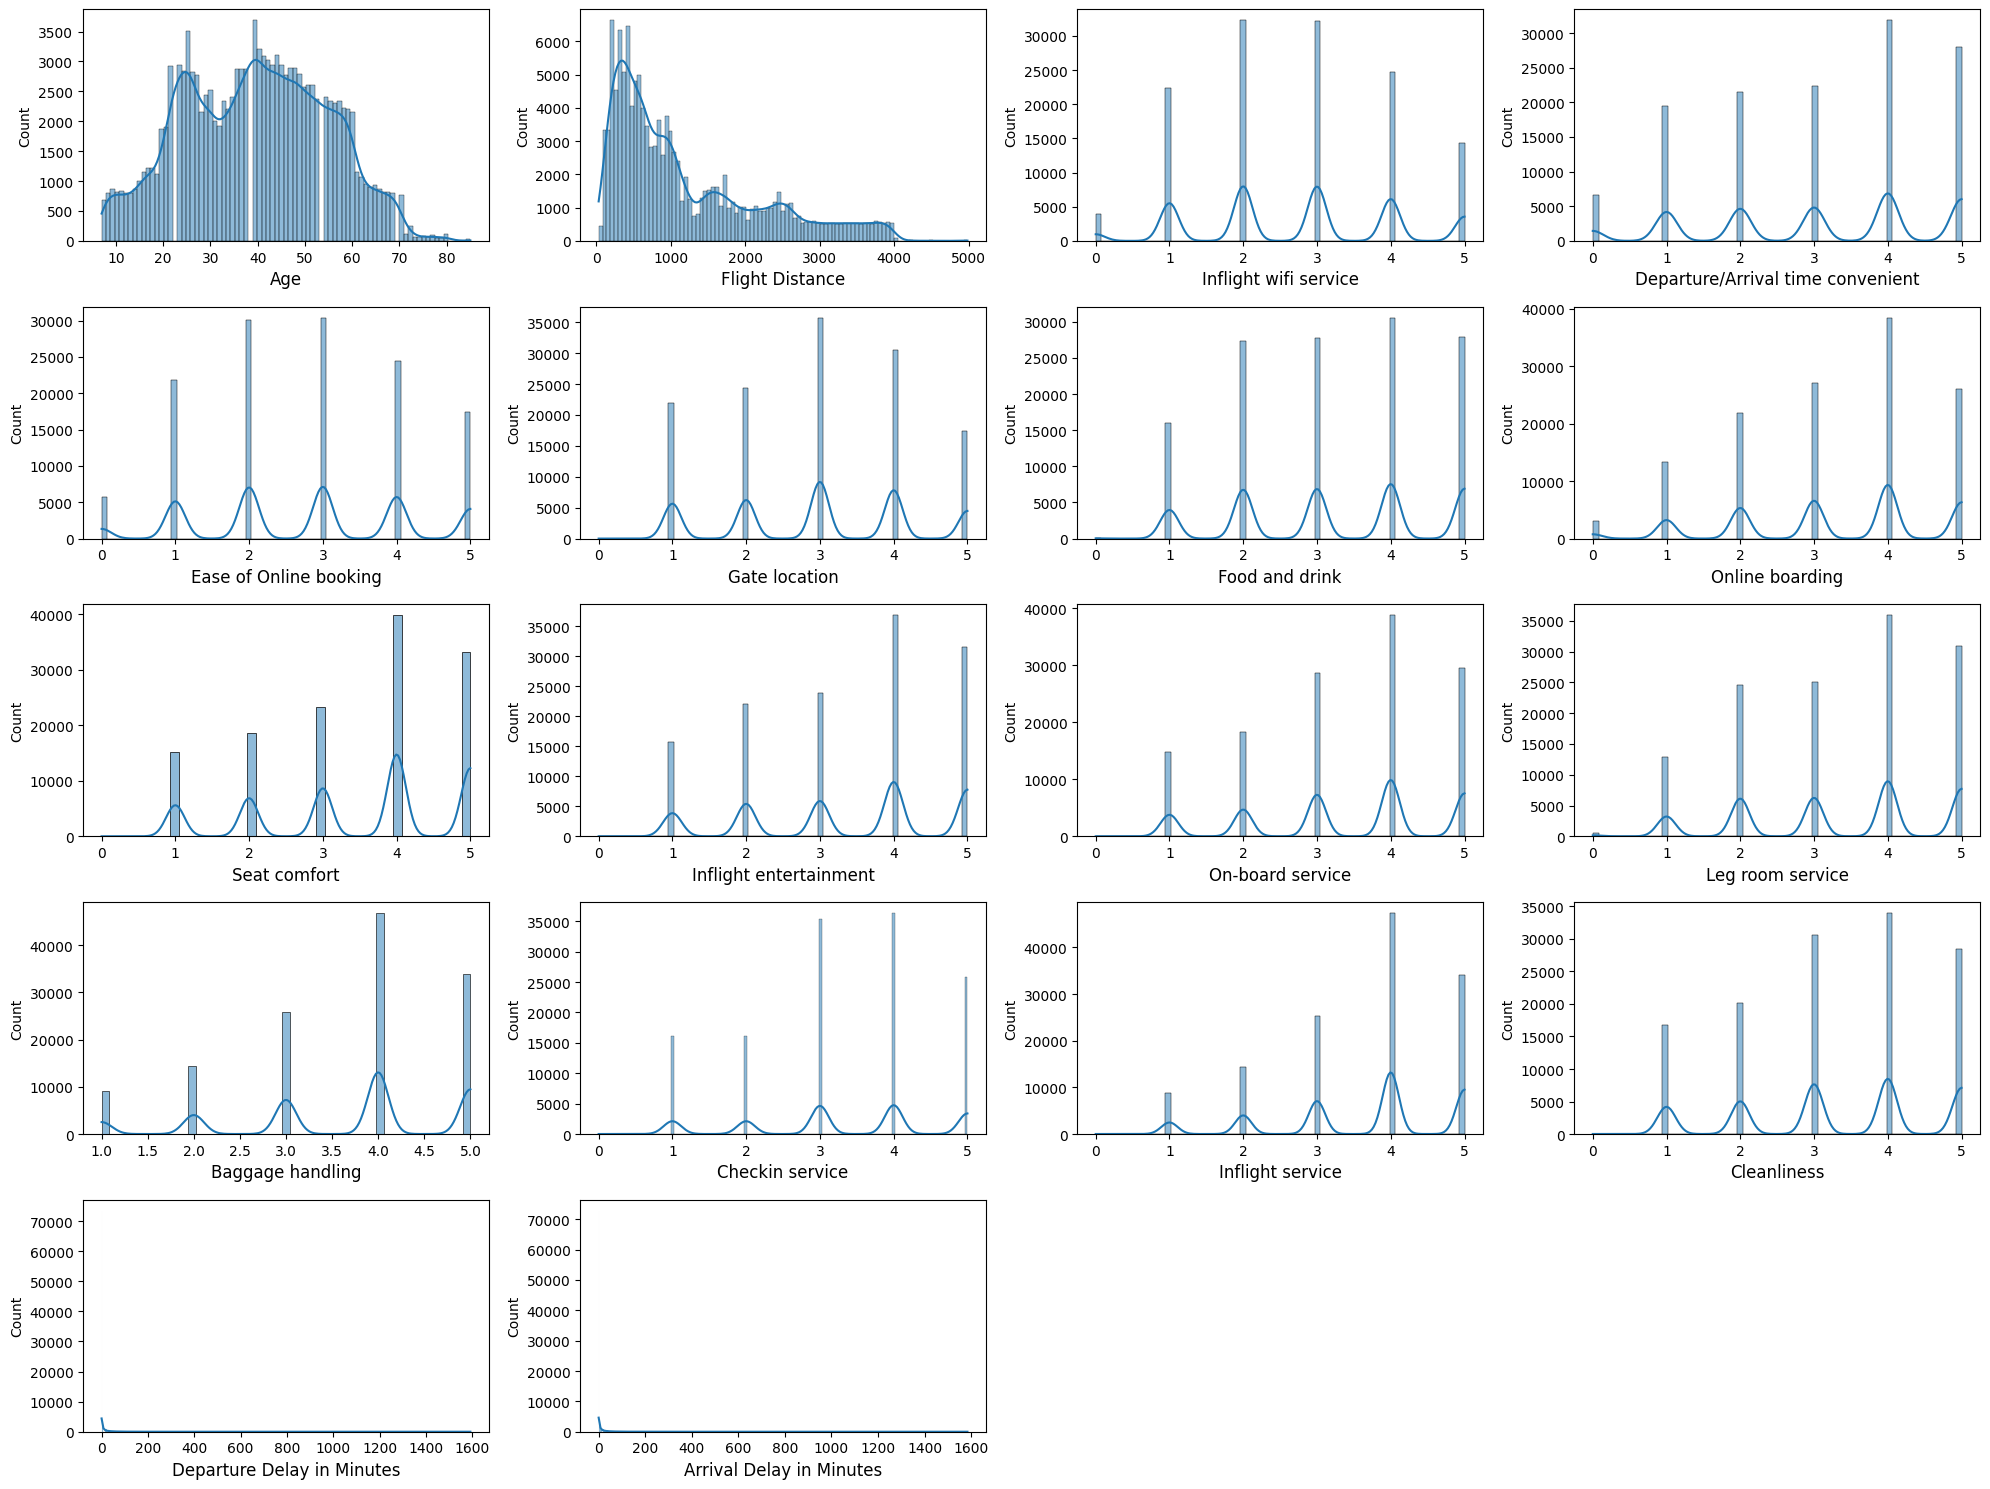

In [ ]:
# Seleccionar solo columnas numéricas
num_cols = df.select_dtypes(include=['number']).columns
n = len(num_cols)

cols = 4
rows = mt.ceil(n / cols)

plt.figure(figsize=(cols*5, rows*3))

for i, column in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[column], kde=True)
    plt.xlabel(column, fontsize=12)

plt.tight_layout()
plt.show()

Se imputa por mediana, ya que los datos están muy dispersos Arrival_Delay_in Minutes.

In [ ]:
# Tratamiento de valores faltantes
target_col = df.columns[-1]

for col in df.columns:
    if df[col].isnull().any():
        if col == target_col:
            imputer = SimpleImputer(strategy='most_frequent')
        elif is_numeric_dtype(df[col]):
            valores_unicos = df[col].dropna().unique()
            if set(valores_unicos).issubset({0, 1}) and len(valores_unicos) <= 2:
                imputer = SimpleImputer(strategy='most_frequent')
            else:
                imputer = SimpleImputer(strategy='median')
        elif is_object_dtype(df[col]) or is_string_dtype(df[col]):
            imputer = SimpleImputer(strategy='most_frequent')
        else:
            continue

        # Imputar y reemplazar
        df[col] = imputer.fit_transform(df[[col]]).ravel()

Ahora se mira la proporción de outliers para tomar una decisión de eliminarlos o imputarlos,

In [ ]:
# Se seleccionan sólo las columnas númericas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Se crea una serie booleana para marcar filas con outliers
col_outlier = pd.Series(False, index=df.index)

# Se detectan outliers columna por columna usando el método IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Se identifican outliers en esta columna
    col_outliers = (df[col] < lower_bound) | (df[col] > upper_bound)

    # True si hay outlier en cualquier columna
    col_outlier |= col_outliers

# Número de filas con al menos un outlier
filas_con_outliers = col_outlier.sum()

# Proporción de filas con outliers (%)
proporcion_filas_outliers = filas_con_outliers / df.shape[0] * 100

print("Filas con al menos un outlier:", filas_con_outliers)
print("Proporción de filas con outliers: {:.2f}%".format(proporcion_filas_outliers))

Filas con al menos un outlier: 36232
Proporción de filas con outliers: 27.90%


Al ver que la proporción de outliers es bastante alta, se imputarán estos valores por la media o la mediana dependiendo de el umbral de asimetría,

In [ ]:
for col in numeric_cols:
    # Se calcula el IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Se identifican outliers
    condicion = (df[col] < lower_bound) | (df[col] > upper_bound)

    # Se calcula asimetría
    skew_value = df[col].skew()

    # Se elige método de imputación según el sesgo
    if abs(skew_value) > 0.5:
        valor_imputacion = df[col].median()
        metodo = "mediana"
    else:
        valor_imputacion = df[col].mean()
        metodo = "media"

    # Se ajusta el tipo de imputación según el dtype original de la columna
    if pd.api.types.is_integer_dtype(df[col]):
        valor_imputacion = int(round(valor_imputacion))
    elif pd.api.types.is_float_dtype(df[col]):
        valor_imputacion = float(valor_imputacion)

    # Se imputan outliers
    df.loc[condicion, col] = valor_imputacion

Se vuelven a graficar los datos,

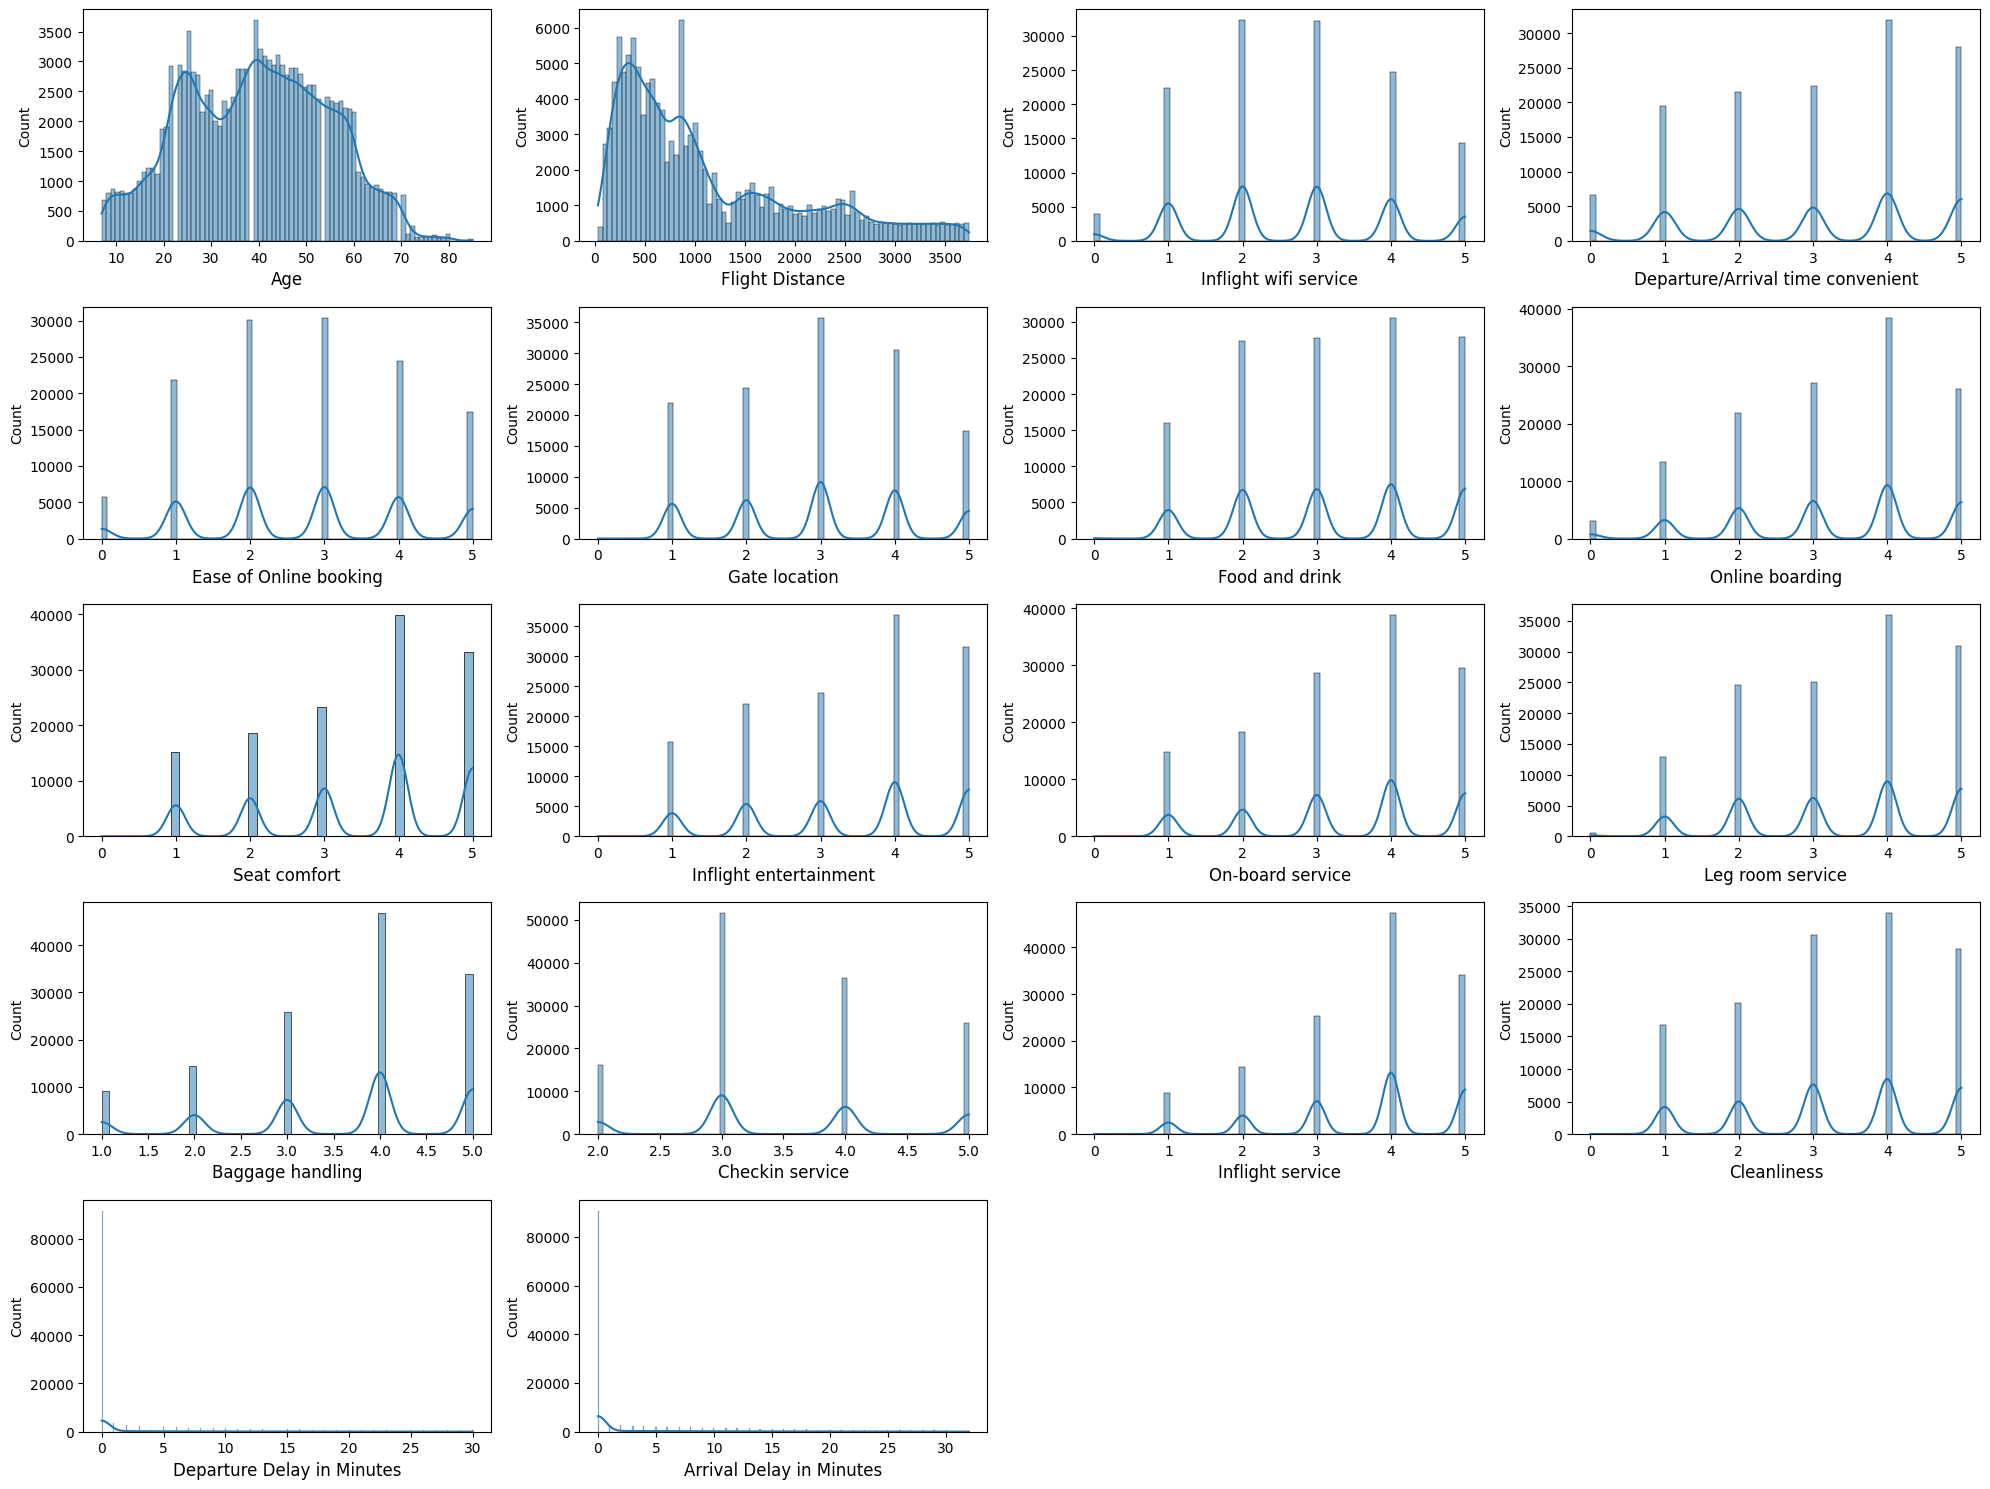

In [ ]:
plt.figure(figsize=(cols*5, rows*3))

for i, column in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[column], kde=True)
    plt.xlabel(column, fontsize=12)

plt.tight_layout()
plt.show()

Ahora se analizan las características con datos relevantes,

In [ ]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1123.358285,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.554335,3.642193,3.286326,3.200477,3.532345
std,15.119360,912.303505,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,0.945291,1.176669,1.313682,6.669747,7.150864
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1620.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,2.000000,3.000000
max,85.000000,3739.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30.000000,32.000000


Se contabiliza la cantidad de personas satisfechas o no satisfechas,

In [ ]:
df['satisfaction'].value_counts()

,count
satisfaction,
neutral or dissatisfied,73452
satisfied,56428


Miramos por última vez los datos,

In [ ]:
df.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,3,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,3,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


### Preprocesamiento de Datos

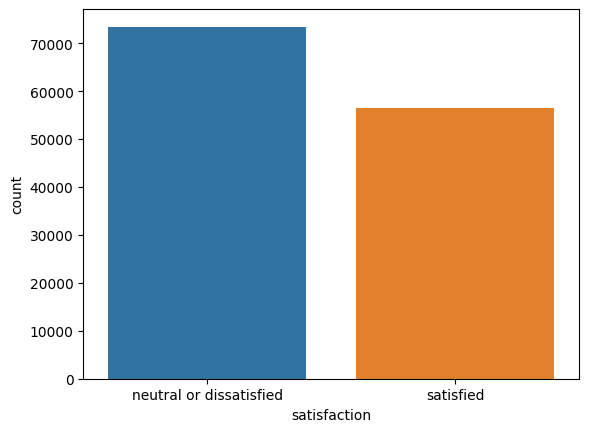

In [ ]:
# Gráfico de barras por cada clase
sns.countplot(data=df,x='satisfaction', hue='satisfaction')
plt.show()

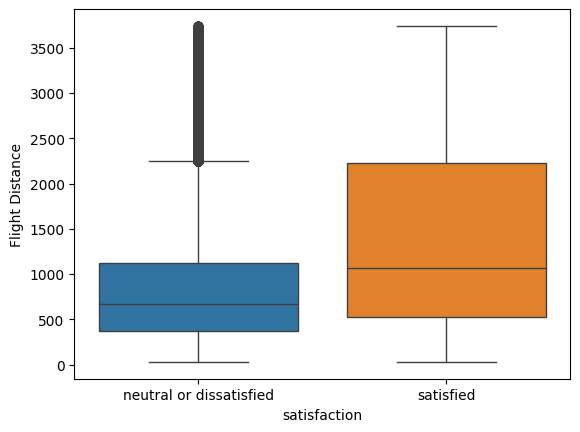

In [ ]:
# Gráfico de caja
sns.boxplot(x='satisfaction',y='Flight Distance',data=df, hue='satisfaction')
plt.show()

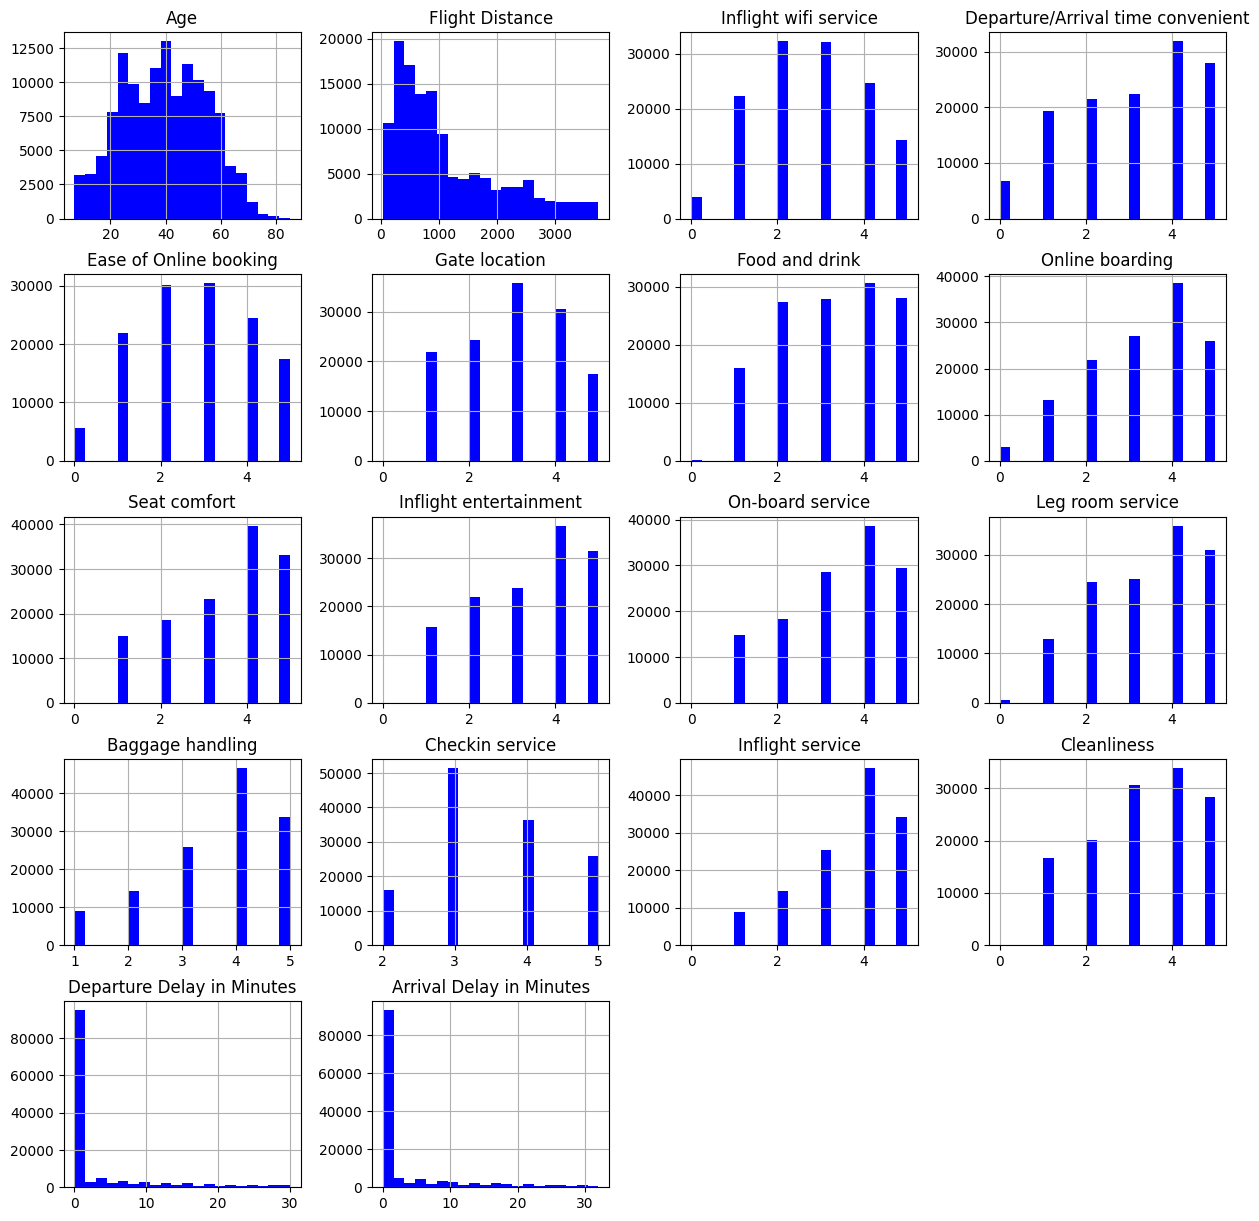

In [ ]:
df.hist(bins = 20, figsize = (15, 15), color = 'b')
plt.show()

In [ ]:
# Obtenemos las características
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
# Se detectan las columnas categóricas
cat_cols = df.select_dtypes(include=['object', 'category']).columns.drop(df.columns[-1])
cat_indices = [df.columns.get_loc(col) for col in cat_cols]

# Se detectan las columnas numéricas
num_indices = [i for i in range(df.shape[1] - 1) if i not in cat_indices]

# Se crea el transformador
ct = ColumnTransformer(
    transformers=[('num', StandardScaler(), num_indices),
                  ('encoder', OneHotEncoder(drop='first',sparse_output=False, dtype=int), cat_indices)],
                    remainder='passthrough')

le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Saber que clase es 0 y 1
print(le.classes_)

['neutral or dissatisfied' 'satisfied']


In [ ]:
# Visualizar el array y
print(y)

[0 0 1 ... 0 1 0]


### Separación en Base de datos de Entrenamiento y Prueba

In [ ]:
# Se divide la base de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Escalado de Datos

In [ ]:
# Se escalan las variables
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [ ]:
# Visualizar el array X_train
print(X_train)

[[-0.55602933 -0.94542971 -0.54610489 ...  1.          1.
   0.        ]
 [-1.41495429  0.48630386 -0.54610489 ...  1.          1.
   0.        ]
 [ 0.50110909 -0.96954773  0.95877265 ...  0.          1.
   0.        ]
 ...
 [-0.15960242 -0.87855701  1.71121142 ...  0.          1.
   0.        ]
 [-1.6792389  -0.84457252  0.95877265 ...  1.          1.
   0.        ]
 [-0.35781588 -0.27889524 -0.54610489 ...  0.          1.
   0.        ]]


### Entrenamiento del Modelo

Ahora entrenamos una Red Neuronal Artificial (ANN).

In [ ]:
# Inicializamos y definimos las capas
ANN_model = Sequential([
    Input(shape=(23,)),
    Dense(units=12, kernel_initializer = "uniform", activation="relu"),
    Dense(units=12, kernel_initializer = "uniform", activation="relu"),
    Dense(units=1, kernel_initializer = "uniform", activation="sigmoid")])

In [ ]:
# Definimos hiperpárametros
ANN_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Entrenamos a la Red Neuronal Artificial
ANN_model.fit(X_train, y_train,
    epochs=100,
    batch_size=50,
    validation_split=0.2)

Epoch 1/100
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8168 - loss: 0.4156 - val_accuracy: 0.9160 - val_loss: 0.2140
Epoch 2/100
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9187 - loss: 0.2053 - val_accuracy: 0.9296 - val_loss: 0.1774
Epoch 3/100
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9288 - loss: 0.1777 - val_accuracy: 0.9310 - val_loss: 0.1690
Epoch 4/100
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9310 - loss: 0.1724 - val_accuracy: 0.9320 - val_loss: 0.1677
Epoch 5/100
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9317 - loss: 0.1694 - val_accuracy: 0.9341 - val_loss: 0.1620
Epoch 6/100
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9340 - loss: 0.1652 - val_accuracy: 0.9352 - val_loss: 0.1594
Epoch 7/100
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9328 - loss: 0.1631 - val_accuracy: 0.9359 - val_loss: 0.1583
Epoch 8/100
1455/1455 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9325 - loss: 0

In [ ]:
# Evaluar accuracy
loss, acc = ANN_model.evaluate(X_test, y_test)
print(f"Accuracy en test: {acc:.3f}")

1218/1218 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9477 - loss: 0.1202
Accuracy en test: 0.948


Ahora evaluamos si está satisfecho o no satisfecho

In [ ]:
# Predicciones en forma de probabilidad
y_pred_prob = ANN_model.predict(X_test)

# Convertir a clases (0 o 1)
y_pred = (y_pred_prob >= 0.5).astype(int)

1218/1218 ━━━━━━━━━━━━━━━━━━━━ 1s 980us/step


Realizamos una predicción,

In [ ]:
# Se obtiene la probabilidad con la red neuronal
prob = ANN_model.predict(ct.transform([['Female', 'Loyal Customer', 26, 'Business travel', 'Business', 1142, 2, 2, 2, 2, 5, 5, 5,
                                        2, 2, 5, 3, 3, 4, 2, 11, 9.0]]))[0][0]

# Se aplica el umbral para obtener clase 0 o 1
pred = int(prob >= 0.5)

print("Probabilidad predicha:", prob)
print("Clase predicha:", pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Probabilidad predicha: 0.99998224
Clase predicha: 1


In [ ]:
# Obtenemos las predicciones
print(y_pred.reshape(len(y_pred),1))

[[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


### Rendimiento del Modelo

In [ ]:
# Obteniendo la precisión del modelo
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9481316086644082


In [ ]:
# Matriz de confusión
confusion_matrix(y_test,y_pred)

array([[21075,   904],
       [ 1117, 15868]])

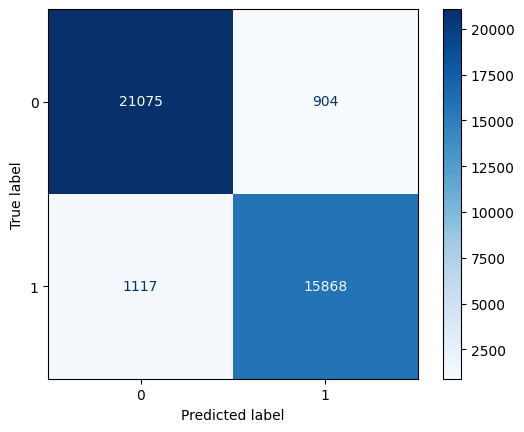

In [ ]:
# Visualizando la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [0, 1])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()

In [ ]:
# Obteniendo el reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     21979
           1       0.95      0.93      0.94     16985

    accuracy                           0.95     38964
   macro avg       0.95      0.95      0.95     38964
weighted avg       0.95      0.95      0.95     38964



### Experimentación de Hiperpárametros (KerasTuner)

Para conocer con cuál cantidad de capas y neuronas se obtiene el mejor resultado, se experimenta con KerasTuner.

In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(23,)))

    # Capas ocultas con hiperparámetros dinámicos
    for i in range(hp.Int('num_layers', min_value=1, max_value=3, step=1)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=8, max_value=128, step=8),
            activation=hp.Choice('activation', values=['relu', 'tanh'])
        ))

    # Capa de salida (binaria)
    model.add(Dense(1, activation='sigmoid'))

    # Compilación con optimizador como hiperparámetro
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

#### Optimización Bayesiana

Se emplea Optimización Bayesiana, la cual irá buscando cuáles son los mejores hiperparámetros dentro de las iteraciones que se seleccionen.

In [ ]:
# Se utiliza Bayesian Optimization
tuner = BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='ann_opt_bo')

early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Búsqueda de hiperpárametros
tuner.search(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1)

Trial 10 Complete [00h 01m 25s]
val_accuracy: 0.9584800004959106

Best val_accuracy So Far: 0.961944580078125
Total elapsed time: 00h 13m 28s


In [ ]:
# Se obtiene el mejor modelo y sus hiperparámetros
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparams = tuner.get_best_hyperparameters(num_trials=1)[0]

# Se muestran los mejores hiperparámetros encontrados
print("Mejor número de capas:", best_hyperparams.get('num_layers'))
for i in range(best_hyperparams.get('num_layers')):
    print(f"   - Neuronas en capa {i+1}:", best_hyperparams.get(f'units_{i}'))
print("Mejor función de activación:", best_hyperparams.get('activation'))
print("Mejor optimizador:", best_hyperparams.get('optimizer'))

Mejor número de capas: 3
   - Neuronas en capa 1: 112
   - Neuronas en capa 2: 88
   - Neuronas en capa 3: 72
Mejor función de activación: tanh
Mejor optimizador: rmsprop


In [ ]:
# Se mide el accuracy del mejor modelo
loss, acc = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy en test: {acc:.4f}")

Accuracy en test: 0.9596


Se predice con el mejor modelo obtenido,

In [ ]:
# Predicciones en forma de probabilidad
y_pred_prob = best_model.predict(X_test)

# Convertir a clases (0 o 1)
y_pred = (y_pred_prob >= 0.5).astype(int)

1218/1218 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
# Se obtiene la probabilidad con la red neuronal
prob = best_model.predict(ct.transform([['Female', 'Loyal Customer', 26, 'Business travel', 'Business', 1142, 2, 2, 2, 2, 5, 5, 5,
                                        2, 2, 5, 3, 3, 4, 2, 11, 9.0]]))[0][0]

# Se aplica el umbral para obtener clase 0 o 1
pred = int(prob >= 0.5)

print("Probabilidad predicha:", prob)
print("Clase predicha:", pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Probabilidad predicha: 0.99995834
Clase predicha: 1


In [ ]:
# Obtenemos las predicciones
print(y_pred.reshape(len(y_pred),1))

[[0]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]


Se obtienen las métricas,

In [ ]:
# Obteniendo la precisión del modelo
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9596294014988194


In [ ]:
# Matriz de confusión
confusion_matrix(y_test,y_pred)

array([[21527,   452],
       [ 1121, 15864]])

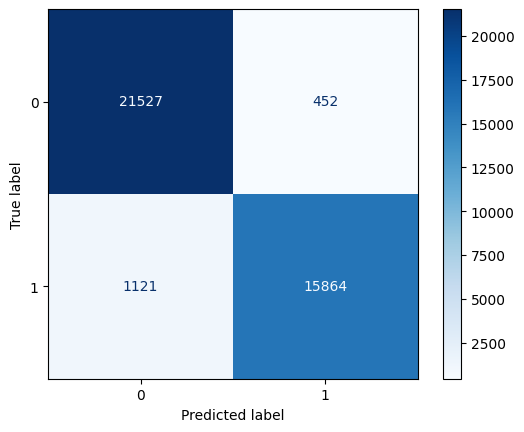

In [ ]:
# Visualizando la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [0, 1])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()

In [ ]:
# Obteniendo el reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     21979
           1       0.97      0.93      0.95     16985

    accuracy                           0.96     38964
   macro avg       0.96      0.96      0.96     38964
weighted avg       0.96      0.96      0.96     38964



## Regresión

Se emplearán Redes Neuronales Artificiales (ANN) para Regresión.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Machine Learning/Bases de Datos/Folds5x2_pp.xlsx')

In [ ]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


Primero se analiza la base de datos,

In [ ]:
# Se verifica la cantidad de datos
df.shape

(9568, 5)

Se puede observar que hay 9568 filas. Se observará de qué tipo son estos valores y si hay faltantes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
# Se verifica el tema de los faltantes
df.isnull().sum()[df.isnull().sum() != 0]

,0


Se puede observar que no hay faltantes. Ahora se mira la proporción de outliers para tomar una decisión de eliminarlos o imputarlos,

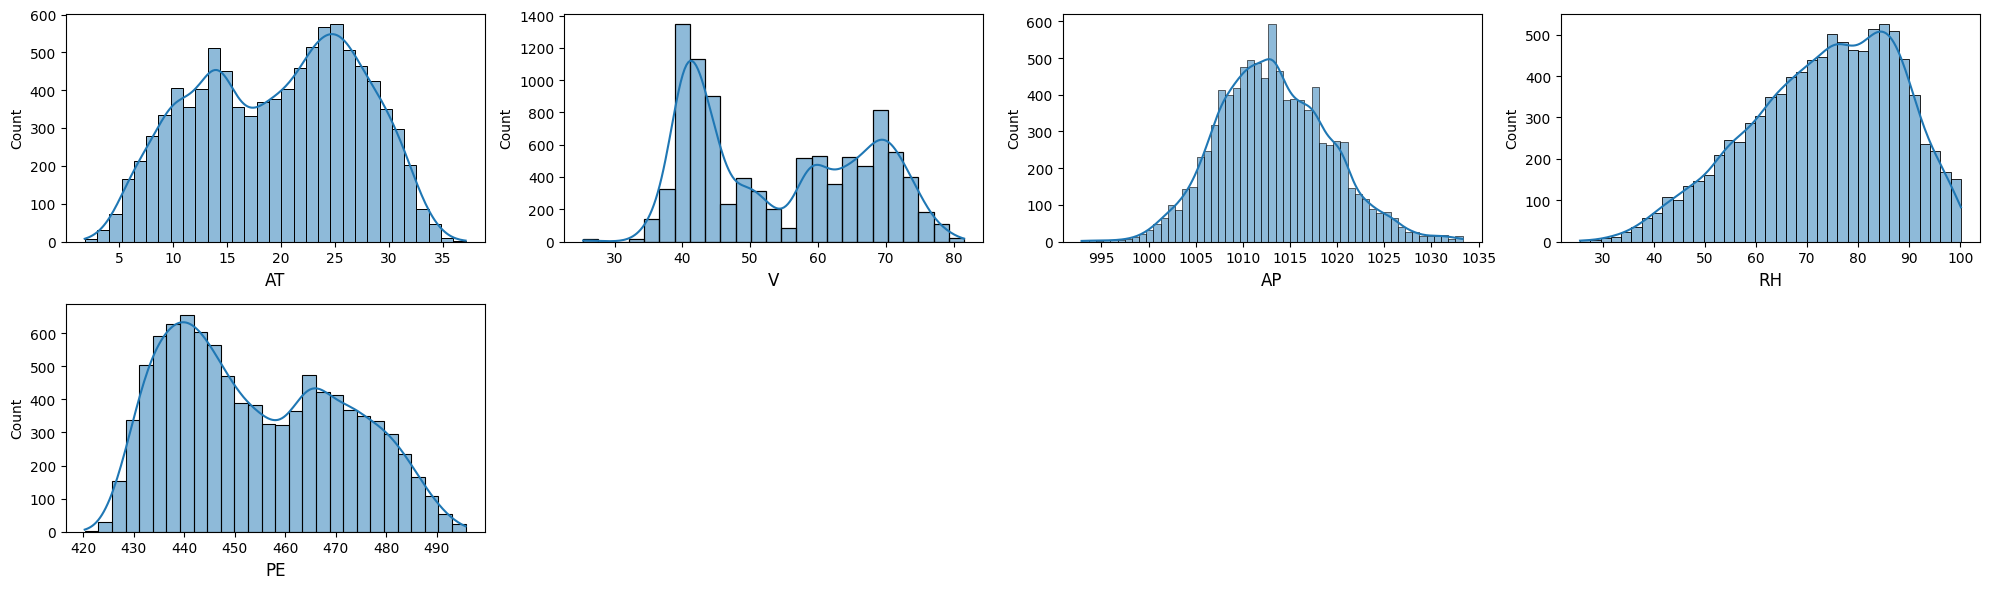

In [ ]:
# Seleccionar solo columnas numéricas
num_cols = df.select_dtypes(include=['number']).columns
n = len(num_cols)

cols = 4
rows = mt.ceil(n / cols)

plt.figure(figsize=(cols*5, rows*3))

for i, column in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[column], kde=True)
    plt.xlabel(column, fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# Se seleccionan sólo las columnas númericas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Se crea una serie booleana para marcar filas con outliers
col_outlier = pd.Series(False, index=df.index)

# Se detectan outliers columna por columna usando el método IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Se identifican outliers en esta columna
    col_outliers = (df[col] < lower_bound) | (df[col] > upper_bound)

    # True si hay outlier en cualquier columna
    col_outlier |= col_outliers

# Número de filas con al menos un outlier
filas_con_outliers = col_outlier.sum()

# Proporción de filas con outliers (%)
proporcion_filas_outliers = filas_con_outliers / df.shape[0] * 100

print("Filas con al menos un outlier:", filas_con_outliers)
print("Proporción de filas con outliers: {:.2f}%".format(proporcion_filas_outliers))

Filas con al menos un outlier: 100
Proporción de filas con outliers: 1.05%


Se procede a eliminar la cantidad de outliers,

In [ ]:
# Se filtran outliers columna por columna
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mantener solo las filas dentro del rango permitido
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [ ]:
# Se mira la cantidad de filas y columnas
df.shape

(9470, 5)

Se procede a graficar de nuevo las distribuciones de probabilidad de los datos,

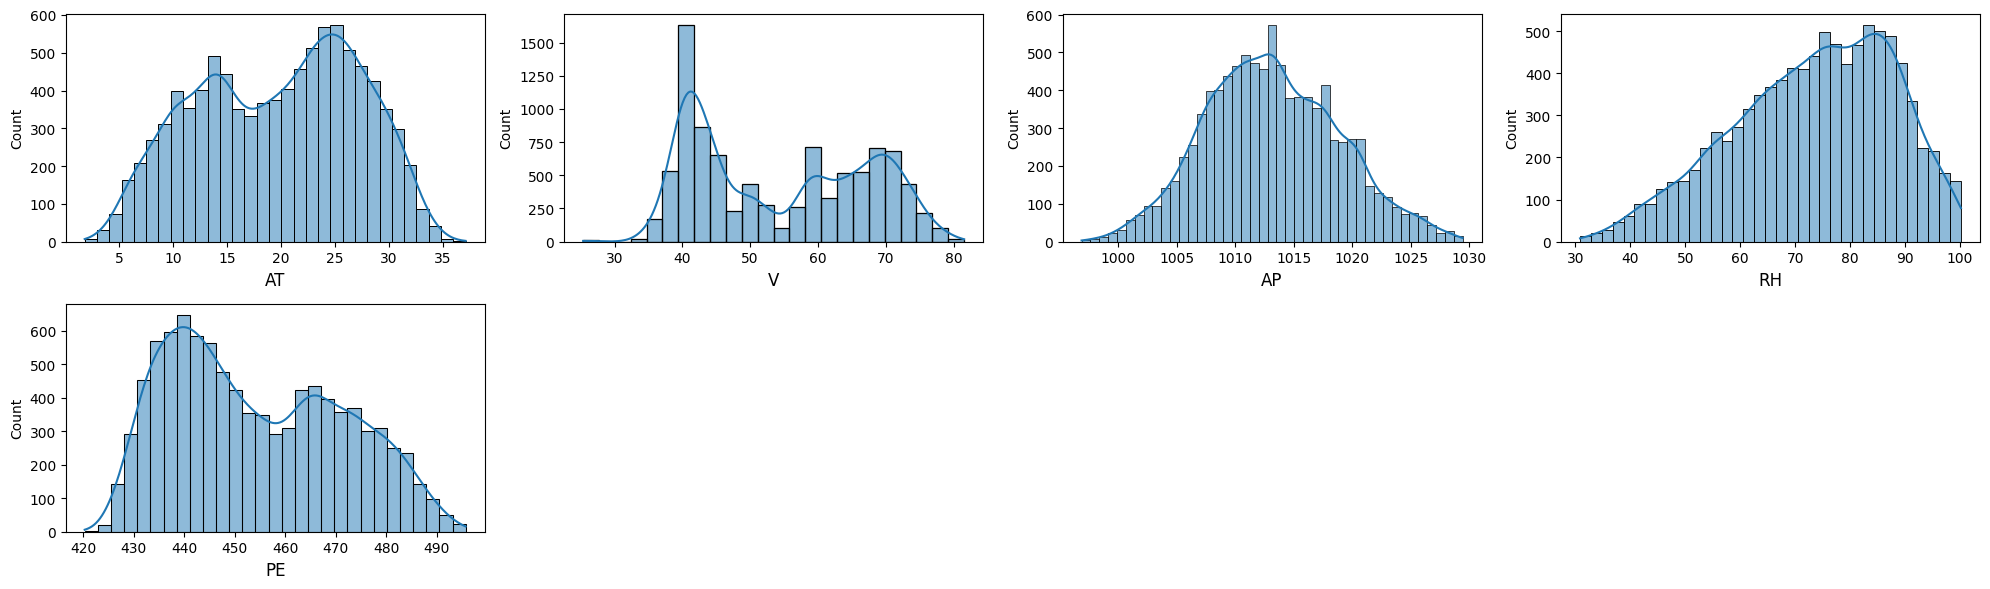

In [ ]:
# Seleccionar solo columnas numéricas
num_cols = df.select_dtypes(include=['number']).columns
n = len(num_cols)

cols = 4
rows = mt.ceil(n / cols)

plt.figure(figsize=(cols*5, rows*3))

for i, column in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[column], kde=True)
    plt.xlabel(column, fontsize=12)

plt.tight_layout()
plt.show()

Se mira una descripción de los datos,

In [ ]:
df.describe()

,AT,V,AP,RH,PE
count,9470.000000,9470.000000,9470.000000,9470.000000,9470.000000
mean,19.720851,54.414126,1013.148365,73.313126,454.207945
std,7.427263,12.701254,5.704407,14.562714,17.029022
min,1.810000,25.360000,996.870000,30.830000,420.260000
25%,13.580000,41.740000,1009.090000,63.270000,439.692500
50%,20.500000,52.720000,1012.900000,74.980000,451.210000
75%,25.760000,66.540000,1017.170000,84.837500,468.187500
max,37.110000,81.560000,1029.410000,100.160000,495.760000


Se observa un gráfico de correlación de los datos,

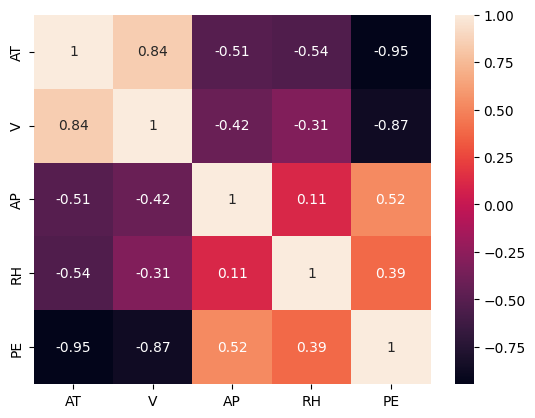

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

### Preprocesamiento de Datos

In [ ]:
# Obtenemos las características
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
# Se detectan las columnas categóricas
cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_indices = [df.columns.get_loc(col) for col in cat_cols]

# Se detectan las columnas numéricas
num_indices = [i for i in range(df.shape[1] - 1) if i not in cat_indices]

# Se crea el transformador
ct = ColumnTransformer(
    transformers=[('num', StandardScaler(), num_indices),
                  ('encoder', OneHotEncoder(drop='first',sparse_output=False, dtype=int), cat_indices)],
                    remainder='passthrough')

### Separación en Base de datos de Entrenamiento y Prueba

In [ ]:
# Se divide la base de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Escalado de Datos

In [ ]:
# Se escalan las variables
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [ ]:
# Visualizar el array X_train
print(X_train)

[[-1.29355478e+00 -9.81545700e-01  1.25216572e+00 -4.82714466e-01]
 [ 1.05838775e+00  4.14779831e-01 -1.45589422e+00 -5.01602474e-02]
 [-2.42113957e-01 -1.72070223e-01 -1.14605155e+00  1.83640982e+00]
 ...
 [ 5.13146350e-01 -6.81040713e-01 -6.24774705e-02 -5.68043981e-04]
 [-1.19662297e+00 -7.29027111e-01  1.83509007e+00  1.09803702e+00]
 [-1.26124418e+00 -1.19363851e-01  2.27447148e+00  2.30862238e-01]]


In [ ]:
# Visualizar el array y
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


### Entrenamiento del Modelo

Ahora entrenamos una Red Neuronal Artificial (ANN).

In [ ]:
# Inicializamos y definimos las capas
ANN_model = Sequential([
    Input(shape=(4,)),
    Dense(units=3, kernel_initializer = "uniform", activation="relu"),
    Dense(units=3, kernel_initializer = "uniform", activation="relu"),
    Dense(units=1, kernel_initializer = "uniform", activation="linear")])

In [ ]:
# Definimos los hiperparámetros
ANN_model.compile(optimizer='adam', loss='mse',metrics=['mae', 'mse'])

In [ ]:
# Entrenamos a la Red Neuronal Artificial
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True)

ANN_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1)

Epoch 1/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 207011.9219 - mae: 454.6626 - mse: 207011.9219 - val_loss: 206721.0625 - val_mae: 454.3375 - val_mse: 206721.0625
Epoch 2/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 206134.4062 - mae: 453.6997 - mse: 206134.4062 - val_loss: 204768.0156 - val_mae: 452.1661 - val_mse: 204768.0156
Epoch 3/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 203358.0938 - mae: 450.5990 - mse: 203358.0938 - val_loss: 199759.1562 - val_mae: 446.5309 - val_mse: 199759.1562
Epoch 4/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 197236.4062 - mae: 443.6596 - mse: 197236.4062 - val_loss: 190777.5469 - val_mae: 436.1962 - val_mse: 190777.5469
Epoch 5/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 187174.8438 - mae: 431.9747 - mse: 187174.8438 - val_loss: 177456.8594 - val_mae: 420.2756 - val_mse: 177456.8594
Epoch 6/100
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 172845.0625 - mae: 414.5827 - mse: 172845.0625 - val_loss: 16019

In [ ]:
# Evaluar MAE y MSE
loss, mae, mse = ANN_model.evaluate(X_test, y_test)
print(f"MAE en test: {mae:.3f}")
print(f"MSE en test: {mse:.3f}")

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.1822 - mae: 3.5909 - mse: 20.1822
MAE en test: 3.579
MSE en test: 19.727


Realizando una predicción,

In [ ]:
# Se debe de hacer en el orden original
print("Predicción:", ANN_model.predict(ct.transform([[14.96, 41.76, 1009.23, 96.62]]))[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicción: 462.83392


In [ ]:
# Obtenemos las predicciones
y_pred = ANN_model.predict(X_test)
print(y_pred.reshape(len(y_pred),1))

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[436.19556]
 [435.3509 ]
 [460.91977]
 ...
 [440.98416]
 [473.68195]
 [469.52493]]


### Rendimiento del Modelo

In [ ]:
# KPI's del Modelo
MAE = mean_absolute_error(y_test, y_pred)
print('MAE: {:0.2f}%'.format(MAE / np.mean(y_test) * 100))
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: {:0.2f}%'.format(RMSE / np.mean(y_test) * 100))
r2 = r2_score(y_test, y_pred)
print('R2: {:0.2f}'.format(r2))

MAE: 0.79%
RMSE: 0.98%
R2: 0.93


### Experimentación de Hiperpárametros (KerasTuner)

Para conocer con cuál cantidad de capas y neuronas se obtiene el mejor resultado, se experimenta con KerasTuner.

In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(4,)))  # Cambia 4 por el número de features de tu dataset

    # Capas ocultas con hiperparámetros más pequeños
    for i in range(hp.Int('num_layers', min_value=1, max_value=3, step=1)):
        model.add(Dense(
            units=hp.Int(f'units_{i}', min_value=3, max_value=24, step=3),
            activation=hp.Choice('activation', values=['relu', 'tanh'])
        ))

    # Capa de salida (regresión)
    model.add(Dense(1, activation='linear'))

    # Compilación del modelo
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
        loss='mse',       # Error cuadrático medio
        metrics=['mae']   # Error absoluto medio
    )

    return model

#### Optimización Bayesiana

Se emplea Optimización Bayesiana, la cual irá buscando cuáles son los mejores hiperparámetros dentro de las iteraciones que se seleccionen.

In [ ]:
# Se utiliza Bayesian Optimization
tuner = BayesianOptimization(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='ann_regression_opt')

# Early stopping basado en pérdida de validación
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True)

# Se ejecuta la búsqueda de hiperparámetros
tuner.search(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1)

Trial 10 Complete [00h 00m 57s]
val_loss: 10468.1787109375

Best val_loss So Far: 21.517263412475586
Total elapsed time: 00h 07m 51s


In [ ]:
# Se obtiene el mejor modelo y sus hiperparámetros
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparams = tuner.get_best_hyperparameters(num_trials=1)[0]

# Se muestran los mejores hiperparámetros encontrados
print("Mejor número de capas:", best_hyperparams.get('num_layers'))
for i in range(best_hyperparams.get('num_layers')):
    print(f"   - Neuronas en capa {i+1}: {best_hyperparams.get(f'units_{i}')}")
print("Mejor función de activación:", best_hyperparams.get('activation'))
print("Mejor optimizador:", best_hyperparams.get('optimizer'))

Mejor número de capas: 1
   - Neuronas en capa 1: 21
Mejor función de activación: relu
Mejor optimizador: adam


In [ ]:
# Evaluación del modelo en el conjunto de test
loss, mse = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida (MSE): {loss:.4f}")
print(f"MAE (Error absoluto medio): {mae:.4f}")

Pérdida (MSE): 18.8180
MAE (Error absoluto medio): 3.5792


Se predice con el mejor modelo obtenido,

In [ ]:
# Se obtiene una predicción con el mejor modelo
pred = best_model.predict(ct.transform([[14.96, 41.76, 1009.23, 96.62]]))[0][0]
print(f"Predicción: {pred}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Predicción: 463.09033203125


In [ ]:
# Predicciones con el mejor modelo
y_pred = best_model.predict(X_test)
print(y_pred.reshape(len(y_pred),1))

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[435.62366]
 [435.01294]
 [460.34717]
 ...
 [439.98456]
 [473.92554]
 [469.45532]]


Se obtienen las métricas,

In [ ]:
# Obteniendo la precisión del modelo
print('RMSE: {:0.2f}%'.format(np.sqrt(mean_squared_error(y_test, y_pred)) / np.mean(y_test) * 100))
print('MAE: {:0.2f}%'.format(mean_absolute_error(y_test, y_pred) / np.mean(y_test) * 100))
print('R2: {:0.2f}%'.format(r2_score(y_test, y_pred) * 100))

RMSE: 0.96%
MAE: 0.77%
R2: 93.49%


## Referencias

*   Airline passenger satisfaction. (2020, February 20). Kaggle. https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction
*   Jacinto, V. R. (2024). Machine learning: Fundamentos, algoritmos y aplicaciones para los negocios, industria y finanzas. Ediciones Díaz de Santos.
*   Raschka, S., & Mirjalili, V. (2017). Python Machine Learning: Machine Learning and Deep Learning with Python, Scikit-learn, and TensorFlow.
*   Tfekci, P. & Kaya, H. (2014). Combined Cycle Power Plant [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5002N
*   Vandeput, N. (2021). Data science for supply chain forecasting. de Gruyter.

